Confusion Matrix:
 [[   0  196    0    0]
 [   0 1188    7    2]
 [   0  411    3    0]
 [   0  191    2    0]]

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       196
           2       0.60      0.99      0.75      1197
           3       0.25      0.01      0.01       414
           4       0.00      0.00      0.00       193

    accuracy                           0.60      2000
   macro avg       0.21      0.25      0.19      2000
weighted avg       0.41      0.60      0.45      2000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


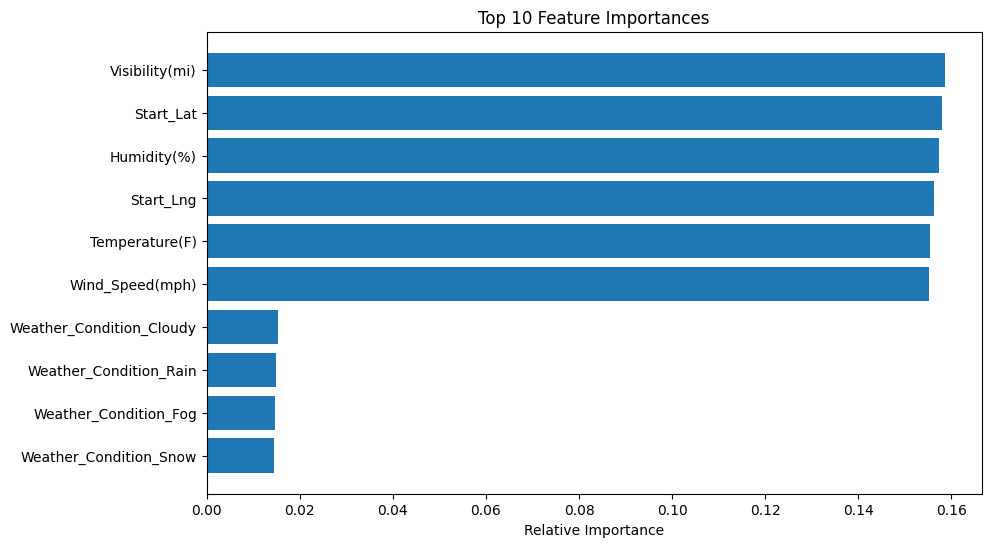

In [1]:
# ===============================
# 🚦 AI Traffic Accident Predictor
# ===============================

# 1. Install required libraries
!pip install -q pandas matplotlib seaborn scikit-learn

# 2. Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 3. Create a synthetic dataset (you can replace this with real accident data)
np.random.seed(42)
n_samples = 10000

data = {
    'Temperature(F)': np.random.normal(60, 15, n_samples),
    'Humidity(%)': np.random.uniform(20, 100, n_samples),
    'Visibility(mi)': np.random.normal(10, 2, n_samples),
    'Wind_Speed(mph)': np.random.normal(7, 3, n_samples),
    'Weather_Condition': np.random.choice(['Clear', 'Rain', 'Fog', 'Snow', 'Cloudy'], size=n_samples),
    'Start_Lat': np.random.uniform(34, 42, n_samples),
    'Start_Lng': np.random.uniform(-118, -72, n_samples),
    'Severity': np.random.choice([1, 2, 3, 4], size=n_samples, p=[0.1, 0.6, 0.2, 0.1])
}

df = pd.DataFrame(data)

# 4. Data Preprocessing
df = pd.get_dummies(df, columns=['Weather_Condition'], drop_first=True)

# 5. Feature Matrix and Target
X = df.drop('Severity', axis=1)
y = df['Severity']

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 8. Predictions and Evaluation
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 9. Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]
plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
